In [2]:
import sagemaker

session = sagemaker.Session(default_bucket = "demo-ouptut-bucket", default_bucket_prefix = "Endpoint/") 
# default_bucket_prefix is not available in older versions of SageMaker
role = sagemaker.get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [3]:
instance_type = "ml.c5.xlarge"

# model_data_url = "s3://sagemaker-ap-south-1-720541911643/tensorflow-training-2023-10-03-12-32-37-552/output/model.tar.gz" # CIFAR10
model_data_url = "s3://tmp-demo/model.tar.gz" # MNIST fashion

# image_url = "763104351884.dkr.ecr.ap-south-1.amazonaws.com/tensorflow-serving:1.15.2-cpu-py3" 
# image_url = "520713654638.dkr.ecr.ap-south-1.amazonaws.com/tensorflow-inference:1.14.0"

In [4]:
from sagemaker.tensorflow import TensorFlowModel

model = TensorFlowModel(model_data=model_data_url, 
                        role = role, 
                        framework_version = "2.0.0", 
                        entry_point = "inference.py", 
                        source_dir = "code"
                       )

predictor = model.deploy(initial_instance_count=1, instance_type=instance_type, endpoint_name = "cat-dog-classifier-200")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
---!

In [18]:
from sagemaker.serializers import JSONSerializer
predictor = sagemaker.predictor.Predictor(endpoint_name = "cat-dog-classifier",
                                          serializer = JSONSerializer(),
                                          # content_type  = "text/csv"
                                         )

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [19]:
from PIL import Image
import numpy as np

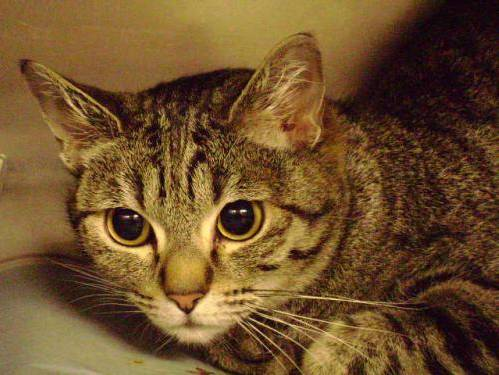

In [20]:
dog_image = Image.open("51.jpg")
dog_image

In [21]:
dog_image = dog_image.resize((256,256))

In [22]:
dog_image_numpy = np.asarray(dog_image)
dog_image_numpy = dog_image_numpy / 255

In [23]:
dog_image_numpy.shape

(256, 256, 3)

In [24]:
dog_image_numpy = dog_image_numpy.reshape((1,256,256,3))

In [25]:
inputs= {'instances': dog_image_numpy}
result = predictor.predict(inputs)

In [26]:
result

b'{\n    "predictions": [[0.99571687]\n    ]\n}'